# Part 1. Vanilla logistic regression

## Recap.

### Sigmoid function

$$ \sigma(h) = \frac{1}{1 + exp(-h)} $$
$$ \sigma(x, w) = \frac{1}{1 + exp(-<x, w>)} $$

### Class predictions

$$ P(y = 1 | x, w) = \sigma(x, w) $$

### Log Loss

$$ L(y, p) = - \frac{1}{m}\sum_{1}^{m}(y_i log(p_i) + (1 - y_i) log(1 - p_i)) $$

### Training

$$ Q = L(y, p) = L(w) \rightarrow min $$
<br>
$$ \frac{dQ}{dw} = ??? $$
<br>
<center>Use chain rule and sigmoid function properties!</center>

In [9]:
import numpy as np
import sklearn
from sklearn.datasets import make_classification

from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

In [11]:
class VanillaLogisticRegression(object):
    '''
    A simple logistic regression for binary classification with gradient descent
    '''
    
    def __init__(self, learning_rate=0.1, max_iter=100000, tolerance=1e-15):
        # Learning rate for gradient descent
        self._lr = learning_rate
        
        self._max_iter = max_iter
        
        # How often to print validation info
        self._validation_freq = 5000
        
        # For convergence criteria
        self._tolerance = tolerance
        
        
    def fit(self, X, y):
        # Add extra dummy feature (x[0] = 1) for bias in linear regression
        X = self.__add_intercept(X)
        n_objects, n_features = X.shape
        
        # Initialize randomly
        self._weights = np.random.random(n_features)
        
        # Iterative gradient descent
        for i in range(self._max_iter):
            h = logit(X, self._weights)
            z = sigmoid(h)
            
            grad = np.dot(X.T, (z - y)) / len(y)
            self._weights -= self._lr * grad
            
            if (np.linalg.norm(self._lr * grad) < self._tolerance):
                print("Converged in {} iterations!".format(i))
                break
            
            if i % self._validation_freq == 0:
                h = logit(X, self._weights)
                p = sigmoid(h)
                
                # Clip values for numeric stability in logarithm
                p = np.clip(p, 1e-10, 1 - 1e-10)
                
                # Compute log loss and accuracy
                loss = self.__loss(y, p)
                acc = np.mean((p >= 0.5) == y)
                
                print("Iteration {}: Loss = {}. Accuracy = {}".format(i, loss, acc))

        
    def predict(self, X, threshold=0.5):
        X = self.__add_intercept(X)
        
        return sigmoid(logit(X, self._weights)) >= threshold
    
    
    def predict_proba(self, X):
        X = self.__add_intercept(X)
        
        return sigmoid(logit(X, self._weights))
    
    
    def __add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    
    def __loss(self, y, p):
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

In [12]:
X, y = sklearn.datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [17]:
clf = VanillaLogisticRegression()

clf.fit(X, y)

print(clf._weights)
a, b, c = clf._weights

Iteration 0: Loss = -0.40482634316423904. Accuracy = 0.9
Iteration 5000: Loss = -0.2607021825149128. Accuracy = 0.93
Iteration 10000: Loss = -0.2607021816182717. Accuracy = 0.93
Iteration 15000: Loss = -0.26070218161827174. Accuracy = 0.93
Converged in 17294 iterations!
[0.99809371 3.35588318 0.70223695]


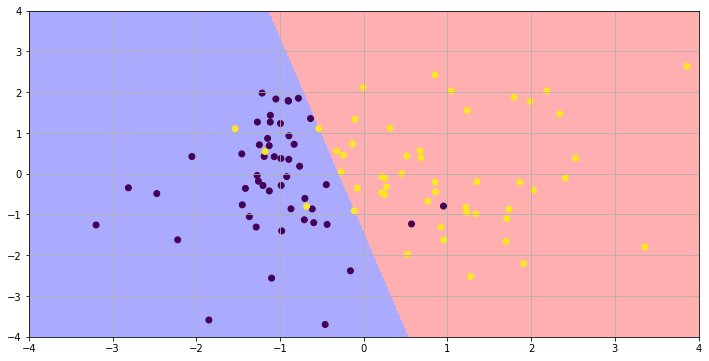

In [18]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12, 6))
xx, yy = np.meshgrid(np.linspace(-4, 4, 1000), np.linspace(-4, 4, 1000))
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))

plt.scatter(X[:,0], X[:,1], c=y)
plt.grid()

plt.show()

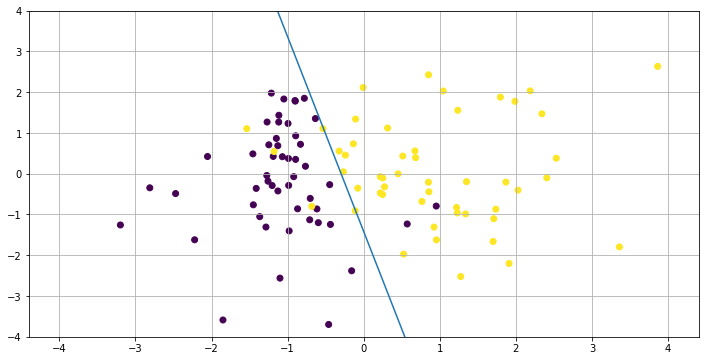

In [15]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(X[:,0], X[:,1], c=y)

xx = np.linspace(-4, 4, 200)
yy = -a / c - xx * b / c
plt.plot(xx, yy)

plt.grid()
plt.ylim((-4, 4))

plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(C=1000, fit_intercept=True)
clf.fit(X, y)
y_predicted = clf.predict(X)

print(np.append(clf.intercept_, clf.coef_))
print(accuracy_score(y, y_predicted))

[0.99719499 3.35397632 0.70172611]
0.93


/Users/nexes/miniconda3/envs/py3_research/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Part 2. Multiclass and regularization

### Softmax function

$$ SoftMax(z)_{j} = \frac{exp(z_{j})}{\sum{exp(z_{i})}} $$
<br>
$$ P(y | x, w) = SoftMax(w_{y}, x) = \frac{exp(<w_{y}, x>)}{\sum{exp(<w_{i}, x>)}} $$
<br>
$$ LogLoss(y_t, y_p) = -log P(y_t | x, w) $$

### Regularization

$$ Q(w) = L(w) + \beta R(w) \rightarrow min $$
<br>
<br>
$$ R(w) = ||w||_{1} $$
<br>
$$ R(w) = ||w||_{2} $$
<br>
$$ R(w) = \lambda ||w||_{1} + (1 - \lambda) ||w||_{2} $$

### Bonus area!

In [9]:
class MulticlassLogisticRegression(LogisticRegression):
    def __init__(self, learning_rate=0.1, max_iter=100000, tolerance=1e-15, regularization_strength=1.0):
        super().__init__(learning_rate, max_iter, tolerance)
        
        pass
    
    def fit(self, X, y):
        pass